# Type 1 Diabetes

What is type 1 Diabetes

Type 1 diabetes, once known as juvenile diabetes or insulin-dependent diabetes, is a chronic condition in which the pancreas produces little or no insulin. Insulin is a hormone needed to allow sugar (glucose) to enter cells to produce energy.  Treatment focuses on managing blood sugar levels with insulin, diet and lifestyle to prevent complications.   

By analysing the variable available of this are Blood Glucose level, Time of blood test, Carbs intake and Insulin dose.  The Blood Glucose level varies on different time of the day, Carbs intake and insulin dose level varies throughout the day.

During the analysis I found that the factors affecting the Blood Glucose level mainly carbs(food eaten) by the child.  The other factors affecting this if the child is sick where physical activity is less the blood glucose level goes high.

So let us use the below 8 different variables for our analysis.

* Date
* Time
* Day of the Week
* Blood Glucose(BG mmol recorded on blood test meter)
* Insulin Units (delivered to the child)
* Carb Ratio (grams per unit)
* Carb Intake (food eaten in grams)
* BG Level 

The Data that we will create with an algorithm, is based on the real life scenario of Type 1 Diabetes.

For this project I have taken the Type 1 Diabetes log for 20 days from  01/10/2019 to 20/10/2019. Blood Glucose level has recorded on average 8 time a day for 20 days.  Based on this real-world phenomenon as a model to synthesise the data.

# Data Cleanup

Activities for data cleanup also considered, creating different data sets using them to make one data frame.  The values has been used for analysis.  The data indexed for easy retrivel.  Duplication of records removed.

# Distributions


# Data Relationships

* Comparison between Carbs eaten and Blood Glucose level
* Time and Blood Glucose level
* The main variable is Blood Glucose level both Hight & Lows.  This is varies for variable reasons time of the day, the person growth (day by day), food eaten 2 hours before the blood test.  The Blood Glucose tested on morning as fast on week days and weekends varies on time.  If the kid is very small its hard to control whats to eat and whats not to eat.  

* The blood glucose level goes high for the following reasons.

1) The Insulin didnt delivered properly to the body
2) The Insulin dose is low for the carbs eaten
3) Carb count is not correct
4) If the Kid is sick

* The blood Glucose level goes low for the following reasons.

1) High Insulin delivered
2) Food not eaten for the carb entered
3) If the Kid is playing and active 

The week day blood glucose level stay stable compare to weekends, this is due to the fact the waking up time on weekends and eating breakfast is differs.

I devise an algorithm to generate the data set, simulating values of the 8 variables for 20 days.  I detail all this work in my notebook, and added code to generate the data set with the above properties.  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.neighbors as nei

from pandas.plotting import scatter_matrix


In [4]:
pwd

'C:\\Users\\babu.b\\Desktop\\ProgDA_Project'

In [24]:
df=pd.read_csv("type1diabetesproject.csv")

# Type 1 Diabetes Actual Dataset
Date        Time	  BG Input (mmol/L)	Insulin Delivered (U)	Carb Ratio (g/U)	Carb Input (grams)	BG Level
01/10/2019	05:45:33	12.1	0.9	4	0	Ideal
01/10/2019	07:58:43	0	10.5	4	42	No BG 
01/10/2019	11:02:41	13.4	0.6	20	13	Ideal
01/10/2019	13:07:00	11.9	2.2	20	33	Ideal
01/10/2019	15:36:27	12	2.2	20	40	Ideal
01/10/2019	18:45:05	0	0.8	16	13	No BG 
01/10/2019	20:44:38	0	0.6	16	11	No BG 
01/10/2019	21:11:03	0	3.3	16	54	No BG 
02/10/2019	08:14:40	6.1	10.5	4	42	Ideal
02/10/2019	11:00:47	10.8	0.6	20	13	Ideal
02/10/2019	13:01:04	4.9	2	20	42	Ideal
02/10/2019	15:12:14	0	0.6	20	13	No BG 
02/10/2019	15:13:43	14.2	3.1	20	62	High
02/10/2019	17:40:38	11.5	1.3	16	21	Ideal
02/10/2019	20:33:42	7.1	3.1	16	51	Ideal
03/10/2019	07:58:20	7.7	5.2	4	20	Ideal
03/10/2019	08:06:36	7.7	8.5	4	34	Ideal
03/10/2019	10:46:44	11.5	0.6	20	13	Ideal
03/10/2019	12:53:20	7.9	2.3	20	46	Ideal
03/10/2019	15:19:30	8.2	1.7	20	35	Ideal
03/10/2019	16:31:36	0	0.6	20	13	No BG 
03/10/2019	18:56:42	7.3	2.3	16	38	Ideal
03/10/2019	22:15:27	0	2.1	16	34	No BG 
04/10/2019	08:02:40	8.3	11	4	43	Ideal
04/10/2019	11:07:09	10.4	1	20	21	Ideal
04/10/2019	12:58:42	11.1	2.5	20	46	Ideal
04/10/2019	16:24:32	4.5	1.8	20	40	Ideal
04/10/2019	20:25:01	17.3	1.8	16	0	High
04/10/2019	21:07:51	0	2.5	16	41	No BG 
04/10/2019	22:10:43	15.2	1.2	16	20	High
05/10/2019	01:40:13	16.1	1.4	4	0	High
05/10/2019	05:46:22	14.6	1.3	4	0	High
05/10/2019	09:12:06	14.5	1.1	4	0	High
05/10/2019	10:13:45	15.2	9.7	4	37	High
05/10/2019	11:30:07	15.2	0.7	20	0	High
05/10/2019	12:11:10	0	0.9	20	18	No BG 
05/10/2019	14:46:25	0	2	20	40	No BG 
05/10/2019	15:00:36	0	1	20	20	No BG 
05/10/2019	16:13:41	8.4	1.5	20	30	Ideal
05/10/2019	20:37:45	5.7	2.1	16	34	Ideal
05/10/2019	20:51:20	0	4.2	16	68	No BG 
06/10/2019	09:39:10	14.5	1.3	4	0	High
06/10/2019	10:10:18	0	4	4	16	No BG 
06/10/2019	10:37:11	0	8.5	20	34	No BG 
06/10/2019	15:00:27	6.7	2	20	40	Ideal
06/10/2019	15:57:52	0	2.5	20	50	No BG 
06/10/2019	18:05:02	13.1	2.8	16	0	Ideal
06/10/2019	18:31:27	0	1.8	16	30	No BG 
06/10/2019	21:06:59	0	0.6	16	10	No BG 
06/10/2019	21:35:49	15.3	0.9	16	13	High
07/10/2019	06:11:52	10.3	0.6	4	0	Ideal
07/10/2019	08:28:24	8	7.7	4	31	Ideal
07/10/2019	11:02:26	15.8	0.6	20	13	High
07/10/2019	13:07:41	12.9	2.3	20	32	Ideal
07/10/2019	14:45:24	15.1	0.8	20	16	High
07/10/2019	16:44:40	7.6	3.8	20	76	Ideal
07/10/2019	21:16:49	0	3.2	16	52	No BG 
08/10/2019	07:53:02	13.3	1.1	4	0	Ideal
08/10/2019	08:18:15	0	8.5	4	34	No BG 
08/10/2019	11:00:23	12.3	0.6	20	13	Ideal
08/10/2019	13:08:25	6.9	1.6	20	32	Ideal
08/10/2019	15:15:47	0	2	20	40	No BG 
08/10/2019	19:48:19	4.8	1.3	16	25	Ideal
08/10/2019	22:20:15	7.4	1.8	16	30	Ideal
09/10/2019	07:59:00	10.6	5.6	4	20	Ideal
09/10/2019	08:08:17	10.6	3.5	4	14	Ideal
09/10/2019	10:49:43	15.2	0.6	20	13	High
09/10/2019	12:55:09	12.1	2.2	20	32	Ideal
09/10/2019	15:22:51	0	1.3	20	27	No BG 
09/10/2019	17:14:08	0	2.5	16	41	No BG 
09/10/2019	22:41:47	4.4	1.9	16	34	Ideal
10/10/2019	02:44:02	14.4	0.7	4	0	High
10/10/2019	05:50:11	11.8	0.7	4	0	Ideal
10/10/2019	07:58:49	6.3	8.5	4	34	Ideal
10/10/2019	10:59:14	7.9	1	20	21	Ideal
10/10/2019	13:14:03	5.8	1.3	20	27	Ideal
10/10/2019	15:42:16	0	3.4	20	69	No BG 
10/10/2019	19:49:53	0	3.7	16	60	No BG 
10/10/2019	20:39:03	0	2.5	16	41	No BG 
11/10/2019	00:00:23	15.3	1.1	4	0	High
11/10/2019	02:44:38	20.7	2	4	0	High
11/10/2019	07:40:19	13.2	1.1	4	0	Ideal
11/10/2019	08:22:38	13.7	8.7	4	34	Ideal
11/10/2019	11:08:50	14.8	0.6	20	13	High
11/10/2019	13:09:15	12.9	2.3	20	32	Ideal
11/10/2019	15:59:01	12.8	3.7	20	65	Ideal
11/10/2019	22:09:43	5.1	1.5	16	26	Ideal
12/10/2019	09:40:17	7.8	10.7	4	42	Ideal
12/10/2019	14:03:28	0	0.5	20	11	No BG 
12/10/2019	14:22:58	0	4	20	80	No BG 
12/10/2019	17:06:32	8.4	2.1	16	35	Ideal
12/10/2019	21:59:47	0	0.8	16	13	No BG 
12/10/2019	22:13:06	0	1	16	16	No BG 
13/10/2019	00:35:11	13	0.4	4	0	Ideal
13/10/2019	10:48:12	0	12	20	57	No BG 
13/10/2019	11:18:37	0	0.5	20	11	No BG 
13/10/2019	15:16:24	6.8	3	20	60	Ideal
13/10/2019	17:57:36	0	0.8	16	13	No BG 
13/10/2019	18:33:23	15.3	1.1	16	0	High
13/10/2019	19:37:15	15.8	0.2	16	0	High
13/10/2019	20:33:49	0	0.8	16	13	No BG 
13/10/2019	21:30:38	0	4.7	16	76	No BG 
14/10/2019	02:06:18	15.7	1.5	4	0	High
14/10/2019	10:18:01	0	3.2	4	13	No BG 
14/10/2019	10:45:26	13.2	8.5	20	43	Ideal
14/10/2019	12:29:30	18.7	1.1	20	0	High
14/10/2019	12:33:34	18.7	0.5	20	11	High
14/10/2019	13:18:19	16	3.5	20	71	High
14/10/2019	17:15:28	0	0.8	16	13	No BG 
14/10/2019	17:30:33	0	1.2	16	20	No BG 
14/10/2019	18:54:41	0	1.5	16	24	No BG 
14/10/2019	19:50:46	13.3	2	16	32	Ideal
14/10/2019	19:56:52	13.3	0.6	16	10	Ideal
14/10/2019	20:07:12	0	0.6	16	11	No BG 
14/10/2019	20:42:19	0	0.6	16	11	No BG 
14/10/2019	22:54:49	16.3	0.8	16	0	High
15/10/2019	01:48:22	17.2	1.5	4	0	High
15/10/2019	08:17:05	13.4	9.6	4	34	Ideal
15/10/2019	11:03:23	17.6	1	20	21	High
15/10/2019	13:10:34	20.8	3.2	20	27	High
15/10/2019	15:14:12	23.9	2	20	0	High
15/10/2019	16:19:56	0	3	20	61	No BG 
15/10/2019	18:30:48	17.8	1.8	16	0	High
15/10/2019	20:00:56	7.7	2.8	16	46	Ideal
16/10/2019	00:50:03	4.4	1	4	22	Ideal
16/10/2019	08:20:28	11.2	8.4	4	31	Ideal
16/10/2019	11:03:54	15.3	0.6	20	12	High
16/10/2019	13:09:54	8.1	1.3	20	27	Ideal
16/10/2019	15:09:34	0	2	20	40	No BG 
16/10/2019	17:43:33	0	0.7	18	13	No BG 
16/10/2019	19:24:40	6.9	3.8	18	69	Ideal
16/10/2019	20:51:05	13.6	0.6	18	11	Ideal
17/10/2019	07:55:51	7.3	10.6	4	42	Ideal
17/10/2019	11:01:45	9.3	0.6	20	12	Ideal
17/10/2019	13:09:44	4.2	1.7	20	41	Ideal
17/10/2019	15:23:59	0	3.6	20	73	No BG 
17/10/2019	20:04:24	0	1.5	18	28	No BG 
17/10/2019	21:19:40	9	1.8	18	34	Ideal
18/10/2019	06:04:24	10.3	0.6	4	0	Ideal
18/10/2019	08:08:34	7.7	10.5	4	42	Ideal
18/10/2019	10:56:01	5.9	0.6	20	12	Ideal
18/10/2019	13:21:04	4.3	1.9	20	43	Ideal
18/10/2019	15:49:26	11.3	3.9	20	75	Ideal
18/10/2019	20:06:31	9	2.9	18	46	Ideal
18/10/2019	21:28:21	0	1	18	18	No BG 
19/10/2019	10:03:05	5.2	9.9	4	40	Ideal
19/10/2019	12:35:54	0	0.5	20	10	No BG 
19/10/2019	13:02:36	8.2	0.7	20	15	Ideal
19/10/2019	15:37:21	5.9	2.5	20	50	Ideal
19/10/2019	16:14:10	0	1.6	20	33	No BG 
19/10/2019	17:06:46	0	0.5	18	10	No BG 
19/10/2019	17:18:49	4	0.8	18	20	Ideal
19/10/2019	19:03:08	0	0.7	18	13	No BG 
19/10/2019	19:27:17	16.7	0.8	18	12	High
19/10/2019	22:14:19	21.5	2.7	18	10	High
19/10/2019	22:36:25	0	1.6	18	30	No BG 
20/10/2019	00:13:04	21.6	0.4	4	0	High
20/10/2019	09:54:21	10.9	0.7	4	0	Ideal
20/10/2019	11:03:04	0	1.2	20	25	No BG 
20/10/2019	11:54:25	0	0.6	20	13	No BG 

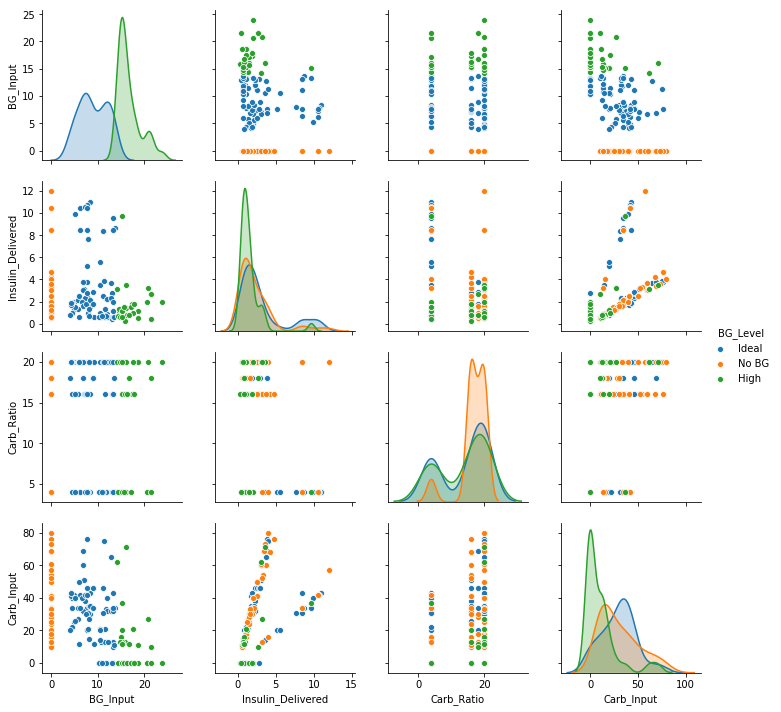

In [49]:
import seaborn as sns
sns.pairplot(df,hue="BG_Level")

In [43]:
import sklearn.neighbors as nei
inputs=df[['Insulin_Delivered','Carb_Input']]
outputs=df['BG_Input']

In [44]:
knn=nei.KNeighborsClassifier(n_neighbors=5)

In [50]:
knn.fit(inputs, outputs)

ValueError: Unknown label type: 'continuous'

In [25]:
df.mean()

BG_Input              7.655625
Insulin_Delivered     2.579375
Carb_Ratio           14.887500
Carb_Input           26.112500
dtype: float64